## Imports


In [27]:
import pandas as pd
import joblib
import altair as alt
from gensim.models import Word2Vec


In [2]:
data = joblib.load('/Users/jasminkazi/code/mizzle-toe/find-your-dream-job/fydjob/output/indeed_proc/processed_data.joblib')

### Exploration


In [3]:
data.shape

(7859, 14)

In [4]:
data.head()

,job_title,job_text,company,location,job_info,query_text,source,job_link,tag_language,reviews,job_info_tokenized,job_text_tokenized,job_text_tokenized_titlecase,job_title_tokenized
0,(Junior) Data Engineer (f/m/x),Customlytics ist die führende App Marketing Be...,Customlytics GmbH,Berlin,(Junior) Data Engineer (f/m/x)\nCustomlytics G...,data science,scrape_json,NaN,en,NaN,"[junior, data, engineer, fmx, customlytics, gm...","[customlytics, ist, die, führende, app, market...","[Customlytics, ist, die, führende, App, Market...","[junior, data, engineer, fmx]"
1,,Responsibilities\n\nAs working student (m/f/x)...,Aroundhome,Berlin,Aroundhome6 Bewertungen - Berlin,data science,scrape_json,NaN,en,NaN,"[aroundhome, bewertungen, berlin]","[responsibilities, as, working, student, mfx, ...","[Responsibilities, As, working, student, mfx, ...",[]
2,,Aufgaben\nAls Werkstudent (m/w/d) IT arbeitest...,Aroundhome,Berlin,"Aroundhome6 Bewertungen - Berlin\nTeilzeit, Pr...",data science,scrape_json,NaN,de,NaN,"[aroundhome, bewertungen, berlin, teilzeit, pr...","[aufgaben, als, werkstudent, mwd, it, arbeites...","[Aufgaben, Als, Werkstudent, mwd, IT, arbeites...",[]
3,,Startdatum\n\nAb sofort\n\nDeine Aufgaben\n\nD...,Alexander Thamm GmbH,Berlin,Alexander Thamm GmbH - Berlin\nFestanstellung,data science,scrape_json,NaN,de,NaN,"[alexander, thamm, gmbh, berlin, festanstellung]","[startdatum, ab, sofort, deine, aufgaben, dein...","[Startdatum, Ab, sofort, Deine, Aufgaben, Dein...",[]
4,Full Stack Developer (m/f/d),We’re Phiture: a leading mobile growth consult...,Phiture,BerlinKreuzberg,Full Stack Developer (m/f/d)\nPhiture - Berlin...,data science,scrape_json,NaN,en,NaN,"[full, stack, developer, mfd, phiture, berlink...","[were, phiture, a, leading, mobile, growth, co...","[Were, Phiture, a, leading, mobile, growth, co...","[full, stack, developer, mfd]"


In [5]:
data = data.drop(columns=['job_info_tokenized','job_text_tokenized_titlecase', 'job_title_tokenized'])

In [6]:
data.columns

Index(['job_title', 'job_text', 'company', 'location', 'job_info',
       'query_text', 'source', 'job_link', 'tag_language', 'reviews',
       'job_text_tokenized'],
      dtype='object')

### No. of...


In [7]:
data['job_title'].count()

7859

In [10]:
data['query_text'].unique()

array(['data science', 'business intelligence', 'data engineer',
       'data scientist', nan], dtype=object)

min:  2.0  max:  148114.0


<AxesSubplot:>

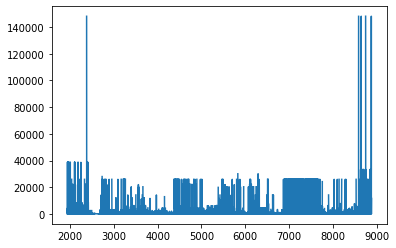

In [25]:
print('min: ',data['reviews'].min(), ' max: ', data['reviews'].max())
data['reviews'].plot()

In [ ]:
#trying out modifying the df so I don't have a df per chart
source_lang = data['tag_language'].value_counts()
type(source_lang)
source_lang= data.groupby('tag_language')
type(source_lang)

In [ ]:
#Lanugauges
data['tag_language'].nunique()
source_lang = pd.DataFrame(data['tag_language'].value_counts()).reset_index()
source_lang = source_lang.rename(columns = {'index':'Posting Language', 'tag_language':'Count'})
type(source_lang)

In [ ]:
alt.Chart(source_lang).mark_bar().encode(
    x=alt.X('Count', stack ='normalize'),
    #y='Posting Language',
    color = 'Count'
)


In [ ]:
alt.Chart(source_lang).transform_joinaggregate(
    Total='sum(Count)',
).transform_calculate(
    Percentage="datum.Count / datum.Total"
).mark_bar().encode(
    alt.X('Percentage:Q', axis=alt.Axis(format='.0%')),
    y='Posting Language:N'
)

In [ ]:
#Companies
print('Hiring Companies: ', data['company'].nunique())
source_comp = pd.DataFrame(data['company'].value_counts().reset_index())
source_comp= source_comp.rename(columns = {'index':'Company', 'company':'Count'})
source_comp

In [ ]:
source_comp = source_comp.nlargest(30, 'Count')

bars = alt.Chart(source_comp).mark_bar().encode(
    x='Count:Q',
    y=alt.Y('Company:N', sort='-x')
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Count:Q'
)

(bars + text).properties(height=500)

In [ ]:
#query_text
print('No of query_text: ',data['query_text'].nunique())
source_job = pd.DataFrame(data['query_text'].value_counts().reset_index())
source_job= source_job.rename(columns = {'index':'Job', 'query_text':'Count'})
source_job

In [ ]:
alt.Chart(source_job).mark_bar().encode(
    x='Count',
    y='Job'
)
#rule = alt.Chart(source_job).mark_rule(color='red').encode(
#    x='mean(Count):Q'
#)

In [ ]:
type(data['job_text_tokenized'][0])

In [ ]:
from fydjob import utils
utils.load_skills()     #loads the skills from JSON file


In [ ]:
# get all the skill sets
categories = utils.load_skills()
categories.keys()
bus_skills = set(utils.load_skills()['business'])
knowledge_skills = set(utils.load_skills()['knowledge'])
code_skills = set(utils.load_skills()['programming'])
soft_skills = set(utils.load_skills()['soft_skills'])


In [ ]:
#get skill for the first token
skill_0 = []

for word in data['job_text_tokenized'][0]:
    if word in code_skills:
        skill_0.append(word)
        
skill_0

In [ ]:
# count the occurences
from collections import Counter
counter0 = Counter(data['job_text_tokenized'][0])

#occs = {x: counter[x] for x in counter.keys() & set(skill_0)}

bus_occs = {x: counter0[x] for x in counter0.keys() & set(bus_skills)}
code_occs = {x: counter0[x] for x in counter0.keys() & set(code_skills)}
knowledge_occs ={x: counter0[x] for x in counter0.keys() & set(knowledge_skills)}
soft_occs ={x: counter0[x] for x in counter0.keys() & set(soft_skills)}
    
print(bus_occs)
print(code_occs)
print(knowledge_occs)
print(soft_occs)


In [ ]:
jd_0 = set(data['job_text_tokenized'][5])
vacancy = data['job_text_tokenized'][5]
jd_0

In [ ]:
jd_0.intersection(bus_skills)

In [ ]:
jd_0.intersection(code_skills)

In [ ]:
jd_0.intersection(soft_skills)

In [ ]:
jd_0.intersection(knowledge_skills)

In [ ]:
for skill in categories:
    print(skill, jd_0.intersection(categories[skill]))


In [ ]:
intersects_know = jd_0.intersection(knowledge_skills)
intersects_code = jd_0.intersection(code_skills)
intersects_soft = jd_0.intersection(soft_skills)
intersect_bus = jd_0.intersection(bus_skills)

In [ ]:
vacancy.count('xgboost')

In [ ]:
occsurrences_know ={} 
for skill in intersects_know:
    occsurrences_know[skill] = vacancy.count(skill)
occsurrences_know


In [ ]:
occsurrences_code ={} 
for skill in intersects_code:
    occsurrences_code[skill] = vacancy.count(skill)
occsurrences_code

In [ ]:
occsurrences_soft ={} 
for skill in intersects_soft:
    occsurrences_soft[skill] = vacancy.count(skill)
occsurrences_soft

In [ ]:
occsurrences_bus ={} 
for skill in intersects_soft:
    occsurrences_bus[skill] = vacancy.count(skill)
occsurrences_bus


In [ ]:
categories

In [ ]:
for category in categories:
    print(category)

In [ ]:
vacancy = data['job_text_tokenized'][5]
vacancy_set = set(vacancy)
matching_skill_per_category = {}

for category in categories:
    matching_skill_per_category[str(category)]=vacancy_set.intersection(categories[category])
#print(matching_skill_per_category)
    
occ = {}
for category in categories:
    occ[category] = {}
    for s in matching_skill_per_category[str(category)]:
        occ[category][s] =  vacancy.count(s)
print(occ)


In [ ]:
data['job_text_tokenized']

In [ ]:
occ

In [ ]:
for vacancy in data['job_text_tokenized'][:3]:
    set(vacancy)

In [ ]:
type(data['job_text_tokenized'].values)

In [ ]:
categories

In [ ]:
#vacancy = data['job_text_tokenized'][5]


def get_skill_count(vacancy):
    # turn the vacancy into a set to compare the words with defined dictionary
    vacancy_set = set(vacancy)
    # get the matching skills of a job description to the skills defined within different categories of skillsets (tech, bus, softskill...)
    matching_skill_per_category = {}
    for category in categories:
        matching_skill_per_category[str(category)]=vacancy_set.intersection(categories[category])
    
    #count the occurences of every matching skill
    occurrences = {}
    for category in categories:
        occurrences[category] = {}
        for skill in matching_skill_per_category[str(category)]:
            occurrences[category][skill] =  vacancy.count(skill)
    return occurrences

In [ ]:
requirement = {}
for index, vacancy in enumerate(data['job_text_tokenized']):
    #print(vacancy)
    requirement[index]= get_skill_count(vacancy)
    occurence =get_skill_count(vacancy)
    

In [ ]:
requirement

In [ ]:
#things to do for streamlit

# ranking of all skills for streamlit --> agregated view of each categ
# percentage of category per job offer (10% bus, 20% tech...)

In [ ]:
#put all vacancies into one huge list
all_vacancies=[]
for job in data['job_text_tokenized']:
    #print(len(job))
    all_vacancies = all_vacancies + job

In [ ]:
len(all_vacancies)

In [ ]:
vacancy_set = set(all_vacancies)
len(vacancy_set)

In [ ]:

matching_skill_per_category = {}

for category in categories:
    matching_skill_per_category[str(category)]=vacancy_set.intersection(categories[category])
#print(matching_skill_per_category)
occ = {}
for category in categories:
    occ[category] = {}
    for s in matching_skill_per_category[str(category)]:
        occ[category][s] =  all_vacancies.count(s)
print(occ)

In [ ]:
def get_skill_aggr(all_vacancies):
    
    vacancy_set = set(all_vacancies)
    matching_skill_per_category = {}

    for category in categories:
        matching_skill_per_category[str(category)]=vacancy_set.intersection(categories[category])
    
    occ = {}
    for category in categories:
        occ[category] = {}
        for s in matching_skill_per_category[str(category)]:
            occ[category][s] =  all_vacancies.count(s)
    return occ

In [ ]:
all_vacancies=[]
for job in data['job_text_tokenized']:
    #print(len(job))
    all_vacancies = all_vacancies + job
total_occurences = get_skill_aggr(all_vacancies)
total_occurences

In [ ]:
df = pd.DataFrame(total_occurences).reset_index()
df= df.rename(columns = {'index':'skill'})

df

In [ ]:
if df['business'] >0:
    df['category'] = 'business'

In [ ]:
for category in df.columns[1:]:
    #print(df[category])
    if df.loc[df[category] > 0,:]:
              df['category']=category
#df.loc[df['a'] > 10, ['a','c']]

In [ ]:
df_bus = df[['skill','business']].dropna().sort_values('business', ascending = False).rename(columns = {'business':'count'})
df_bus['category']='business'
df_bus

In [ ]:
df_know = df[['skill','knowledge']].dropna().sort_values('knowledge', ascending = False).rename(columns = {'knowledge':'count'})
df_know['category']='knowledge'
df_know

In [ ]:
df_code = df[['skill','programming']].dropna().sort_values('programming', ascending = False).rename(columns = {'programming':'count'})
df_code['category']='programming'
df_code

In [ ]:
df_soft = df[['skill','soft_skills']].dropna().sort_values('soft_skills', ascending = False).rename(columns = {'soft_skills':'count'})
df_soft['category']='soft skills'
df_soft

In [ ]:
df_categ = df_bus.append(df_know).append(df_code).append(df_soft)


In [ ]:
df_categ['category'].unique()

In [ ]:
import numpy as np
source = df_categ
category = np.array(df_bus['category'].unique())


base= alt.Chart(source).mark_bar().encode(
    x=alt.X('count'),
    y=alt.Y('skill:N', sort='-x'))


# A dropdown filter
genre_dropdown = alt.binding_select(options=category)
#input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
genre_select = alt.selection_single(fields=['Skill'], bind=genre_dropdown, name="Genre")
#selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
#color = alt.condition(selection,
#                    alt.Color('Origin:N', legend=None),
#                    alt.value('lightgray'))

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")



In [ ]:


category

In [ ]:
source = df_categ.nlargest(100, 'count')
categs = np.array(df_categ['category'].unique())
category = np.insert(categs, 0, 'all')


#Dropdownbox
input_dropdown = alt.binding_select(options = category)
selection = alt.selection_single(fields = ['category'], bind = input_dropdown, name= 'Professional ')

alt.Chart(source).mark_bar().encode(
x = ('count:Q'),
y = alt.Y('skill',sort='-x'),
).add_selection(selection).transform_filter(
    selection)


In [ ]:
from vega_datasets import data
movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
movies

In [ ]:
movies_df = pd.read_json('https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/movies.json')

In [ ]:
movies_df


In [ ]:
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

filter_genres

## Vectorizer


In [28]:

'''
instanciate a model with the .load method and select the path to the saved .model files
'''

w2v_model = Word2Vec.load("../fydjob/data/models/w2v_model_baseline.model")



In [51]:
word = ['business', 'dashboard']
df_words= pd.DataFrame(w2v_model.wv.most_similar(word), columns=['Similar word', 'distance']) # works with single words
df_words

,Similar word,distance
0,metrics,0.780442
1,selfservice,0.776556
2,crosschannel,0.767714
3,dashboards,0.749835
4,reporting,0.737683
5,analytics,0.724615
6,kpis,0.724004
7,marketing,0.717334
8,recommendations,0.714178
9,insights,0.713545
